___
# Atividade: Teoria da Probabilidade
___

## Aula 08

**Referência de Leitura:**
1. Magalhães e Lima (7ª. Edição): pág. 49 a 68 - Probabilidades

**Hoje:**
1. Conceito de Probabilidade
4. Probabilidade Condicional
3. Independência de eventos
5. Teorema de Bayes. Simulação do problema de Monty Hall

**Próxima aula:**
1. Magalhães e Lima (7ª. Edição): pág. 69 a 104 - Variáveis aleatórias discretas
___

In [161]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

#Bibliotecas necessárias
from numpy.random import shuffle, randint, choice


## <font color='blue'>Exercício 1</font>

Monte a simulação de 1000 jogadas de um dado idôneo de 6 faces. Faça o histograma (normalizado) da frequência.

    a) Olhando o histograma, o que pode se dizer sobre as probabilidade de cada face?
    
    b) Discorra sobre o porque da probabilidade não ser exatamente igual à teórica.

(array([ 153.,    0.,    0.,    0.,    0.,  171.,    0.,    0.,    0.,
           0.,  169.,    0.,    0.,    0.,    0.,  164.,    0.,    0.,
           0.,    0.,  172.,    0.,    0.,    0.,  171.]),
 array([ 1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,
         3.2,  3.4,  3.6,  3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ,  5.2,
         5.4,  5.6,  5.8,  6. ]),
 <a list of 25 Patch objects>)

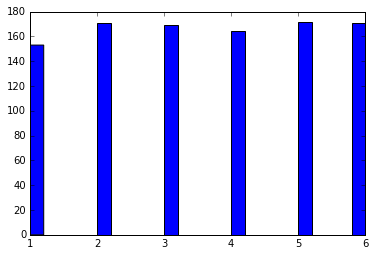

In [162]:
c = ([random.randint(1,6) for i in range(1000)])
plt.hist(c, bins=25)

A probabilidade de um número cair ao jogar um dado de seis lados é de 1/6. Contudo, ao realizar diversos lançamentos, não necessariamente o resultado final será de 1/6 da quantidade de lançamentos para cada número do dado, visto que um lançamento não influencia a probabilidade do outro, sendo possível conseguir três vezes seguidas um mesmo número do dado. Além disso, nada impede que após um número ser tirado 1/6 das vezes do total de lançamentos esperados, ele irá parar de ser tirado. Contudo, quanto maior o número de tentativas, mais próximo da proporção de 1/6 serão os números.

___
## <font color='blue'>Exercício 2</font>

Ampliando o espaço amostral para as possíveis jogadas de 2 dados, analise as seguintes situações:
    
    a) Jogando os dois dados ao mesmo tempo. Qual é a probabilidade de obter soma 7?
    
    b) Jogando um dado e depois o segundo dado. Qual é a probabilidade de obter soma 7 já sabendo o resultado do primeiro? Compare o resultado com item anterior! Por que é igual ou diferente?

<strong>a)</strong>Chances de somar 7 - (1,6); (2,5); (3;4), (4;3), (5,2); (6,1).
Total de possibilidades - 6*6 = 36.
Probabilidade - 6/36 = 1/6

<strong>b)</strong>A chance é de 1/6, sabendo o resultado do primeiro dado, visto que há apenas uma possibilidade em 6 de um dado cair com o número necessário para somar 7 com o outro dado. Exemplo: primeiro dado = 6, logo o segundo possui 1/6 de chances para cair 1. Logo, a possibilidade de somar 7 desta maneira em relação com o item <strong>a)</strong> é igual.


___
## <font color='blue'>Exercício 3</font>

Simule 10000 vezes o problema de Monty Hall¹ , usar o seguinte algoritmo:


* Repetir 10000 vezes:
    * Sorteie um número de porta de 1 a 3 para ser a premiada
    * Sorteie um número de porta de 1 a 3 para ser a porta escolhida.
    * Sorteie um número de porta para ser a aberta, desde que não seja a premiada e nem a porta escolhida. Assim, se:
        * porta premiada é 1 e a escolhida é 1, sorteie entre as portas 2 e 3 para ser aberta
        * porta premiada é 1 e a escolhida é 2, com probabilidade 1 deve abrir a porta 3
        * porta premiada é 1 e a escolhida é 3, com probabilidade 1 deve abrir a porta 2
        * assim para demais casos...
    
    * Calcule quantas vezes indivíduo ganha ao trocar de porta. Ou seja, se:
        * porta premiada é 1, a escolhida é 1 e aberta é 2 (ou 3), indivíduo perde se trocar de porta
        * porta premiada é 1, a escolhida é 2 e aberta é 3, indivíduo ganha se trocar de porta
        * porta premiada é 1, a escolhida é 3 e aberta é 2, indivíduo ganha se trocar de porta
        * assim para demais casos...
        
    * Exibir quantas vezes em 10000, o indivíduo ganhou ao trocar de porta.

Compare o resultado numérico com o resultado analítico obtido via Teorema de Bayes.

¹https://en.wikipedia.org/wiki/Monty_Hall_problem e 
Exercício 1.4.5 de http://www.portalaction.com.br/probabilidades/14-eventos-independentes-e-probabilidade-condicional

In [160]:
import random

#Contadores
ganhou = 0
perdeu = 0

for x in range(10000):
    porta_escolhida = random.randint(1,3)
    porta_premiada = random.randint(1,3)
    porta_aberta = random.randint(1,3)

#A porta a ser aberta não pode ser a que o jogador escolheu ou a com o prêmio.
    while (porta_aberta == porta_premiada) or (porta_aberta == porta_escolhida):
        porta_aberta = random.randint(1,3)
    
#O jogador sempre muda de portas quando uma das outras duas portas é aberta
    if porta_escolhida != porta_premiada:
        ganhou += 1
    else:
        perdeu +=1
        
print("O jogador ganhou:", ganhou)
print("O jogador perdeu:", perdeu)          

O jogador ganhou: 6667
O jogador perdeu: 3333


O resultado de aproximadamente 2/3 de chances de vitória da simulação condiz com o resultado esperado